<a href="https://colab.research.google.com/github/Lilia2022/MachineLearning_Assignment_IIITD/blob/main/2021411_Practice_assignment_3__A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split



In [ ]:
#q1
#Implement a CNN from scratch (without using a custom-designed CNN model like AlexNet etc.) for the
#MNIST handwritten digit recognition task. Your implementation should include convolutional layers,
#pooling layers, and fully connected layers.


# Lire MNIST dataset
mnist = tf.keras.datasets.mnist

# Lire train et test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normaliser la valeur pixel  de rang [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Remodeler les images pour avoir un seul canal (niveaux de gris)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Définir le modèle CNN
"""
tf.keras.Sequential : cela crée un modèle séquentiel, dans lequel les couches sont ajoutées séquentiellement.

tf.keras.layers.Conv2D : Cette couche crée une couche convolutionnelle avec 32 filtres (ou noyaux),
chacun d'une taille de 3x3. Il utilise la fonction d'activation ReLU. Le paramètre input_shape
spécifie la forme des données d'entrée, qui est (28, 28, 1) pour les images d'une hauteur et
d'une largeur de 28 pixels et d'un seul canal (niveaux de gris).

tf.keras.layers.MaxPooling2D : cette couche effectue une opération de regroupement maximal
pour sous-échantillonner la représentation d'entrée, réduisant ainsi sa dimensionnalité.
Il utilise une taille de pool de (2, 2), ce qui signifie qu'il prend la valeur maximale
de chaque patch 2x2 de la carte des fonctionnalités.

Une autre couche Conv2D avec 64 filtres et une taille de noyau 3x3, suivie d'une autre couche MaxPooling2D.

Une autre couche Conv2D avec 64 filtres et une taille de noyau 3x3.

tf.keras.layers.Flatten : cette couche aplatit l'entrée, la transformant en un tableau 1D.
Il est utilisé pour passer des couches convolutives aux couches entièrement connectées.

tf.keras.layers.Dense : Il s'agit d'une couche dense entièrement connectée avec 64 neurones,
utilisant la fonction d'activation ReLU.

Une autre couche dense avec 10 neurones (un pour chaque classe en sortie), utilisant la
fonction d'activation softmax. Il s'agit de la couche de sortie finale, produisant
la distribution de probabilité entre les classes.
"""

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Imprimer le résumé du modèle
model.summary()


11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                         

In [ ]:

#INTERPRETATION OF THE OUTPUT:

"""
Model Architecture:
   - The model is a Sequential model, meaning layers are stacked sequentially.

Layer Information:
   - Conv2D Layers: These are convolutional layers responsible for learning features from input images.
     - The first Conv2D layer has 32 filters/kernels of size 3x3 with ReLU activation.
     - The second Conv2D layer has 64 filters/kernels of size 3x3 with ReLU activation.
     - The third Conv2D layer has 64 filters/kernels of size 3x3 with ReLU activation.
   - MaxPooling2D Layers: These layers perform max-pooling to downsample the feature maps.
     - There are two MaxPooling2D layers, each with a pool size of 2x2.
   - Flatten Layer: This layer flattens the input, preparing it for the fully connected layers.
   - Dense Layers: These are fully connected layers.
     - The first Dense layer has 64 neurons with ReLU activation.
     - The second Dense layer has 10 neurons with softmax activation, producing the output probabilities for each class (0-9 digits).

Output Shape:
   - For each layer, the output shape is provided. The format is `(batch_size, height, width, channels)`.

Parameter Information:
   - Param : Indicates the number of parameters (weights) in each layer.
   - Total params: Total trainable parameters in the model.
   - Trainable params: Parameters that will be updated during training.
   - Non-trainable params: Parameters that are not updated during training (usually from fixed layers like BatchNormalization, etc.).

Memory Information
   - The total number of parameters is 93322, which approximately occupies 364.54 KB of memory.

"""

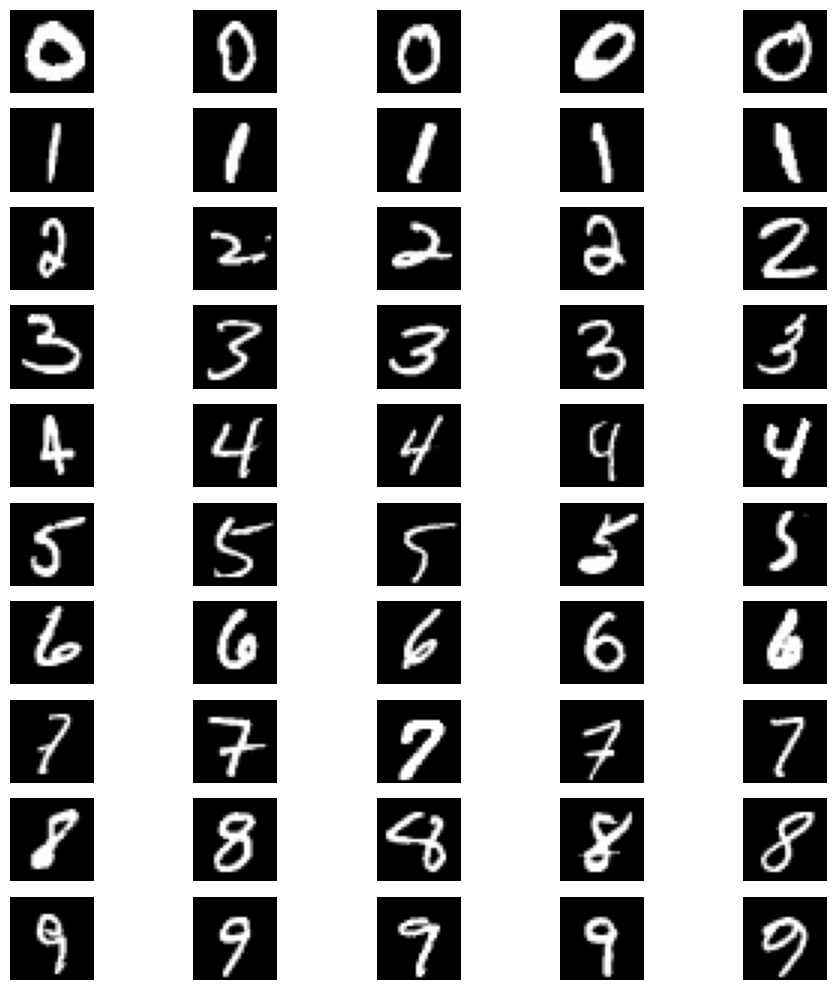

In [ ]:
#q2
#Split the dataset into training and validation. The test set is already given; do not alter that. Generate
#a grid of images displaying 5 random images of each class. Ensure that the images are displayed in the
#original color palette.



# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

# Define a function to display a grid of images
#This function display_image_grid is designed to create a grid of images for visualization purposes
def display_image_grid(images, labels, num_images=5):
    num_classes = len(np.unique(labels))
    fig, axes = plt.subplots(num_classes, num_images, figsize=(10, 10))

    for class_label in range(num_classes):
        class_indices = np.where(labels == class_label)[0]
        selected_indices = np.random.choice(class_indices, num_images, replace=False)

        for i, index in enumerate(selected_indices):
            ax = axes[class_label, i]
            ax.imshow(images[index].squeeze(), cmap='gray')  # Assuming grayscale images
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Display a grid of 5 random images for each class in the training set
display_image_grid(train_images, train_labels)


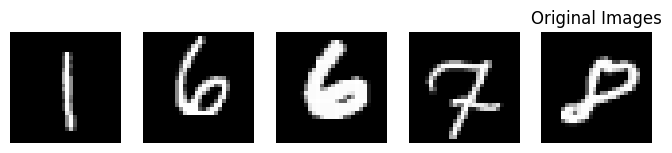

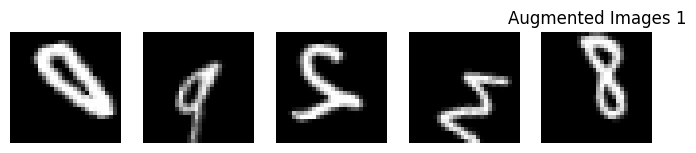

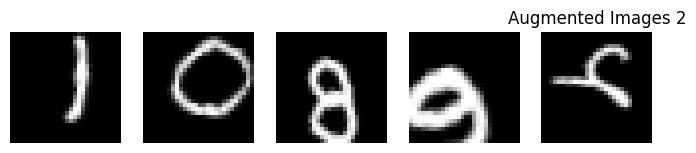

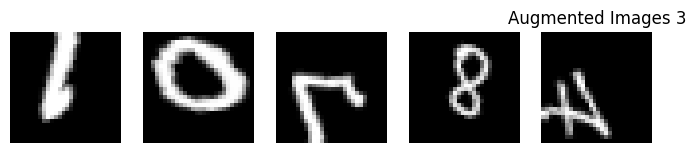

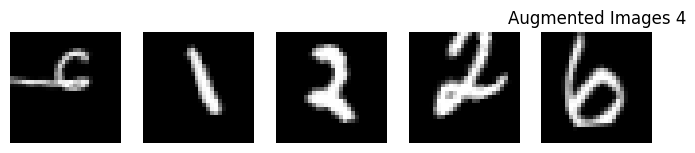

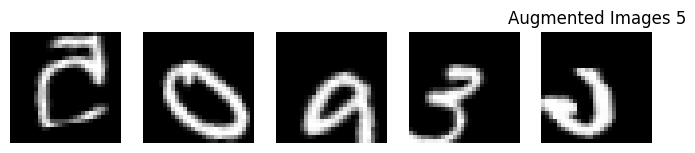

In [ ]:
#q3
#Implement data augmentation techniques like rotation, scaling, and translation
#to improve model performance.


# Create an ImageDataGenerator instance with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zoom in or out by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels using the nearest available value
)

# Fit the ImageDataGenerator on the training data
datagen.fit(train_images)

# Generate augmented images
batch_size = 32
augmented_generator = datagen.flow(train_images, train_labels, batch_size=batch_size)

# Example: Visualize augmented images
num_augmented_images = 5  # Number of augmented images to visualize for each original image

# Plot original images
plt.figure(figsize=(10, 10))
for i in range(num_augmented_images):
    plt.subplot(1, num_augmented_images + 1, i + 1)
    plt.imshow(train_images[i].squeeze(), cmap='gray')  # Squeeze removes the channel dimension
    plt.axis('off')
plt.title('Original Images')

# Plot augmented images
for j in range(num_augmented_images):
    plt.figure(figsize=(10, 10))
    for i in range(num_augmented_images):
        augmented_images, _ = augmented_generator.next()
        plt.subplot(1, num_augmented_images + 1, i + 1)
        plt.imshow(augmented_images[i].squeeze(), cmap='gray')  # Squeeze removes the channel dimension
        plt.axis('off')
    plt.title(f'Augmented Images {j+1}')
    plt.show()


In [ ]:
#q4
#Train your CNN model on the MNIST dataset and report the training and
#validation accuracy and loss curves.

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(val_images, val_labels))



Epoch 1/5
844/844 [==============================] - 55s 63ms/step - loss: 0.1947 - accuracy: 0.9422 - val_loss: 0.0687 - val_accuracy: 0.9787
Epoch 2/5
844/844 [==============================] - 49s 58ms/step - loss: 0.0518 - accuracy: 0.9837 - val_loss: 0.0513 - val_accuracy: 0.9870
Epoch 3/5
844/844 [==============================] - 47s 55ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 0.0458 - val_accuracy: 0.9862
Epoch 4/5
844/844 [==============================] - 47s 56ms/step - loss: 0.0293 - accuracy: 0.9912 - val_loss: 0.0313 - val_accuracy: 0.9913
Epoch 5/5
844/844 [==============================] - 47s 56ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0515 - val_accuracy: 0.9858


In [ ]:
#This output gives the insights into how the model is learning over epochs,
#how well it's generalizing (via validation metrics), and the time it takes
#for each epoch. Overall, the model seems to be performing well, with both
#training and validation accuracies steadily increasing, indicating effective learning

"""
Epoch 1/5:
Training loss: 0.1947, Training accuracy: 94.22%
Validation loss: 0.0687, Validation accuracy: 97.87%
It took approximately 55 seconds to complete this epoch.

Epoch 2/5:
Training loss: 0.0518, Training accuracy: 98.37%
Validation loss: 0.0513, Validation accuracy: 98.70%
It took approximately 49 seconds to complete this epoch.

Epoch 3/5:
Training loss: 0.0354, Training accuracy: 98.87%
Validation loss: 0.0458, Validation accuracy: 98.62%
It took approximately 47 seconds to complete this epoch.

Epoch 4/5:
Training loss: 0.0293, Training accuracy: 99.12%
Validation loss: 0.0313, Validation accuracy: 99.13%
It took approximately 47 seconds to complete this epoch.

Epoch 5/5:
Training loss: 0.0218, Training accuracy: 99.31%
Validation loss: 0.0515, Validation accuracy: 98.58%
It took approximately 47 seconds to complete this epoch.
"""

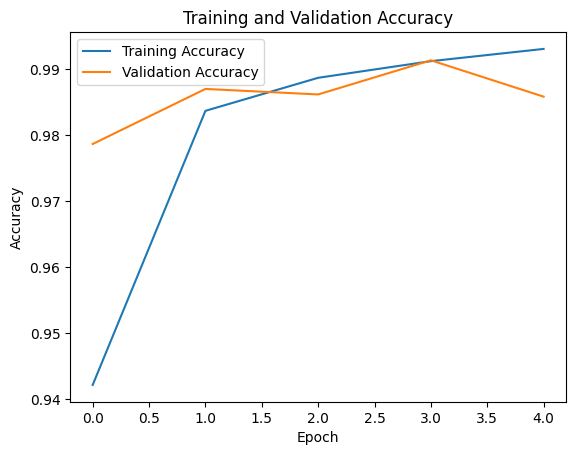

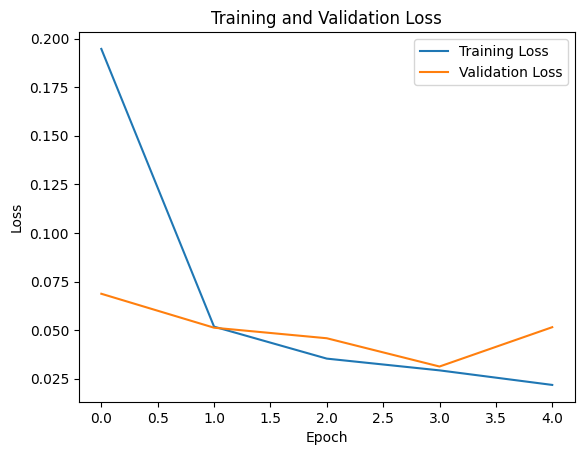

In [ ]:

# Get training and validation accuracy and loss from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
"""TRAINING AND VALIDATION ACCURACY
This pattern suggests that the model might be overfitting to the training data after epoch 0.5,
as the training accuracy continues to improve while the validation accuracy plateaus or even decreases slightly

TRAINING AND VALIDATION LOSS
these plots suggest that the model is initially learning well from the training data,
but it starts to overfit after a certain point, as evidenced by the increasing gap
between the training and validation loss.
"""



In [ ]:
#q5
#Experiment with different hyper-parameters (e.g., learning rate, batch size, and many more)
#and analyze their impact on the model’s performance.


#first defines a dictionary called hyperparameter_grid containing different values for hyperparameters
hyperparameter_grid = {
    'learning_rate': [0.001, 0.005, 0.01],
    'batch_size': [32, 64, 128],
    'dropout_rate': [0.2, 0.3, 0.4]
}
#It initializes an empty list called experiments to store combinations of hyperparameters.
experiments = []

# Generate combinations of hyperparameters
#it iterates over each combination of learning rate, batch size, and dropout rate using nested loops
for lr in hyperparameter_grid['learning_rate']:
    for batch_size in hyperparameter_grid['batch_size']:
        for dropout_rate in hyperparameter_grid['dropout_rate']:
            experiment = {'learning_rate': lr, 'batch_size': batch_size, 'dropout_rate': dropout_rate}
            experiments.append(experiment)

print("Total number of experiments:", len(experiments))


Total number of experiments: 27


In [ ]:
#formera un modèle distinct pour chaque expérience, évaluera ses performances sur l'ensemble de validation,
#puis analyser l'impact des différents hyperparamètres sur les performances du modèle

results = []

for i, experiment in enumerate(experiments):
    print(f"Experiment {i+1}/{len(experiments)}:")
    print(experiment)

    # Build and compile the model
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(experiment['dropout_rate']),  # Add dropout layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=experiment['learning_rate'])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels, epochs=5, batch_size=experiment['batch_size'], validation_data=(val_images, val_labels), verbose=0)

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(val_images, val_labels, verbose=0)

    # Save results
    results.append({'experiment': experiment, 'val_loss': val_loss, 'val_accuracy': val_accuracy})

# Print results
for result in results:
    print(result)


Experiment 1/27:
{'learning_rate': 0.001, 'batch_size': 32, 'dropout_rate': 0.2}
Experiment 2/27:
{'learning_rate': 0.001, 'batch_size': 32, 'dropout_rate': 0.3}
Experiment 3/27:
{'learning_rate': 0.001, 'batch_size': 32, 'dropout_rate': 0.4}
Experiment 4/27:
{'learning_rate': 0.001, 'batch_size': 64, 'dropout_rate': 0.2}
Experiment 5/27:
{'learning_rate': 0.001, 'batch_size': 64, 'dropout_rate': 0.3}
Experiment 6/27:
{'learning_rate': 0.001, 'batch_size': 64, 'dropout_rate': 0.4}
Experiment 7/27:
{'learning_rate': 0.001, 'batch_size': 128, 'dropout_rate': 0.2}
Experiment 8/27:
{'learning_rate': 0.001, 'batch_size': 128, 'dropout_rate': 0.3}
Experiment 9/27:
{'learning_rate': 0.001, 'batch_size': 128, 'dropout_rate': 0.4}
Experiment 10/27:
{'learning_rate': 0.005, 'batch_size': 32, 'dropout_rate': 0.2}
Experiment 11/27:
{'learning_rate': 0.005, 'batch_size': 32, 'dropout_rate': 0.3}
Experiment 12/27:
{'learning_rate': 0.005, 'batch_size': 32, 'dropout_rate': 0.4}
Experiment 13/27:
{'le

In [ ]:
"""
:
Experiment Design:
The script evaluates 27 different experiments, varying three hyperparameters:
Learning rate: 0.001, 0.005, 0.01
Batch size: 32, 64, 128
Dropout rate: 0.2, 0.3, 0.4

ANALYSIS of Results:
1. Impact of Learning Rate:
   - Lower learning rates (0.001) generally yield better validation loss and
accuracy across different batch sizes and dropout rates. This indicates that
a slower learning rate allows the model to converge more effectively.
   - Higher learning rates (0.01) tend to lead to higher validation loss and
lower accuracy, especially noticeable when combined with larger batch sizes and higher dropout rates.

2. Effect of Batch Size:
   - Smaller batch sizes (32) often result in better validation performance
compared to larger batch sizes (64, 128) in terms of both loss and accuracy.
This suggests that smaller batch sizes help the model generalize better.
   - Increasing the batch size can lead to slightly degraded performance,
especially evident when combined with higher learning rates and dropout rates.

3. Influence of Dropout Rate:
   - Dropout is a regularization technique used to prevent overfitting by
randomly dropping units (along with their connections) during training.
   - Generally, lower dropout rates (0.2) tend to perform better than
higher dropout rates (0.3, 0.4) in terms of validation loss and accuracy.
   - However, the difference in performance between dropout rates is not as pronounced compared to the impact of learning rate and batch size.

### Overall Observations:
- Lower learning rates and smaller batch sizes contribute to better model performance, indicating the importance of cautious optimization and regularization strategies.
- Dropout regularization shows a consistent but less significant impact on performance compared to learning rate and batch size.
- The best-performing combination appears to be a learning rate of 0.001, a batch size of 32, and a dropout rate of 0.2, achieving a high validation accuracy while maintaining low validation loss.

### Recommendations:
- Based on these observations, it would be advisable to prioritize lower learning rates and smaller batch sizes during hyperparameter tuning.
- Experimenting with different dropout rates can still provide marginal improvements, especially when dealing with complex models prone to overfitting.
- Fine-tuning hyperparameters iteratively and systematically, while monitoring validation metrics closely, can lead to better-performing models on the MNIST dataset.
"""

In [ ]:
#q6
#List the model’s summary with the number of trainable parameters.

#summarizing the model
model.summary()


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_82 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_83 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_27 (Flatten)        (None, 576)             

In [ ]:
#q7
#Demonstrate the concepts of overfitting and underfitting with different sized architectures
#and the methods to overcome them.

#Define a basic CNN model
#We'll start by defining a simple CNN model with a few convolutional
# layers, pooling layers, and fully connected layers. This will serve as our baseline model.

def create_basic_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

basic_model = create_basic_model()


In [ ]:
#Define more complex models
#We can then define more complex models by adding additional
#convolutional layers, increasing the number of neurons,
#and applying regularization techniques such as dropout.

def create_complex_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

complex_model = create_complex_model()


In [ ]:
#Train the models
#We'll train each model on the MNIST dataset. During training,
#we'll monitor both training and validation performance to observe how the models learn.

# Compile the models
basic_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
complex_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the basic model
basic_history = basic_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(val_images, val_labels))

# Train the complex model
complex_history = complex_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(val_images, val_labels))


Epoch 1/10
844/844 [==============================] - 56s 65ms/step - loss: 0.1955 - accuracy: 0.9409 - val_loss: 0.0689 - val_accuracy: 0.9787
Epoch 2/10
844/844 [==============================] - 47s 55ms/step - loss: 0.0553 - accuracy: 0.9831 - val_loss: 0.0544 - val_accuracy: 0.9827
Epoch 3/10
844/844 [==============================] - 48s 57ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0402 - val_accuracy: 0.9878
Epoch 4/10
844/844 [==============================] - 46s 55ms/step - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.0376 - val_accuracy: 0.9897
Epoch 5/10
844/844 [==============================] - 45s 54ms/step - loss: 0.0224 - accuracy: 0.9928 - val_loss: 0.0367 - val_accuracy: 0.9890
Epoch 6/10
844/844 [==============================] - 47s 56ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0364 - val_accuracy: 0.9898
Epoch 7/10
844/844 [==============================] - 48s 56ms/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0418 - val_accuracy:

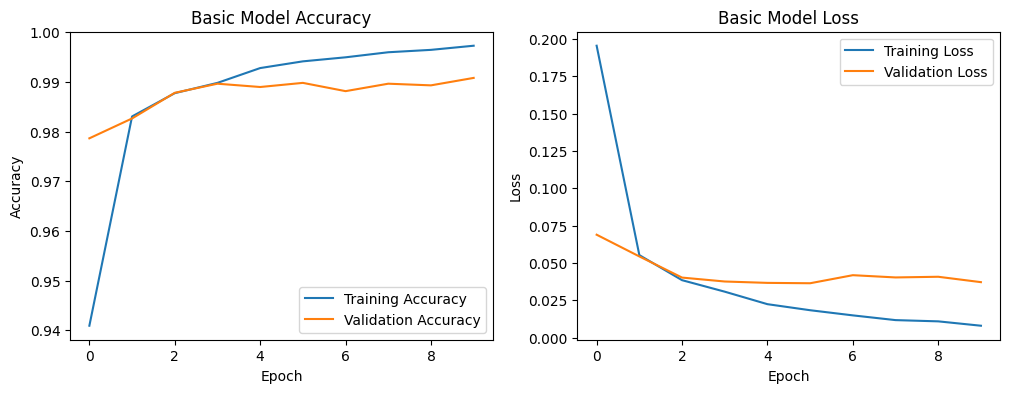

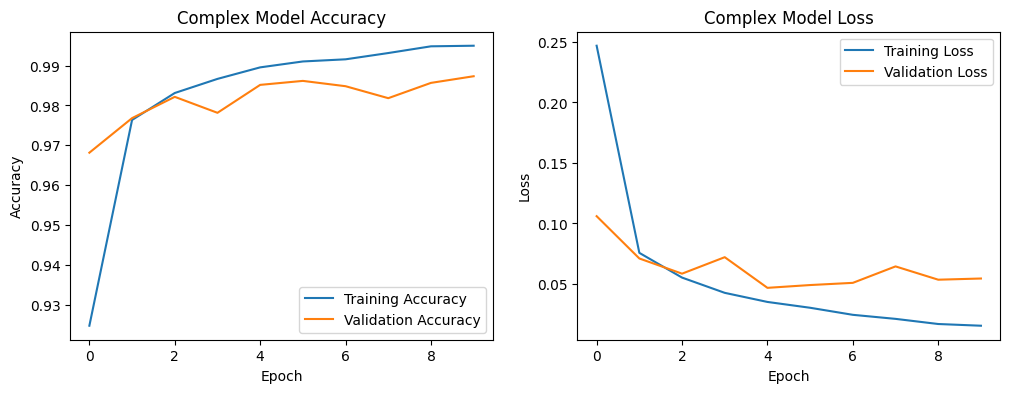

In [ ]:
#Evaluate performance
#After training, we'll evaluate the performance of each model on both the training
#and validation datasets to identify signs of overfitting or underfitting.


# Plot accuracy and loss for the basic model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(basic_history.history['accuracy'], label='Training Accuracy')
plt.plot(basic_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Basic Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(basic_history.history['loss'], label='Training Loss')
plt.plot(basic_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Basic Model Loss')
plt.legend()
plt.show()

# Plot accuracy and loss for the complex model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(complex_history.history['accuracy'], label='Training Accuracy')
plt.plot(complex_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Complex Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(complex_history.history['loss'], label='Training Loss')
plt.plot(complex_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Complex Model Loss')
plt.legend()
plt.show()
